In [1]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import nibabel as nib

In [3]:
import os
os.chdir("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\")

In [4]:
img = nib.load('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-pre.nii.gz')

In [5]:
segm = nib.load('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-cerebellum.nii.gz')

In [9]:
img_data = img.get_data()

segm_data = segm.get_data()

C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
from augment3D import Augment3D
import numpy as np

path = "MPRAGE_x2/"
path_seg = "seg_x2/"
output_path = "output/"
categorical = False


In [19]:
def to_uint8(data):
    data = data.astype(np.float)
    data[data < 0] = 0
    return ((data - data.min()) * 255.0 / data.max()).astype(np.uint8)

In [23]:
import cv2 as cv
def histeq(data):
    for slice_index in range(data.shape[2]):
        data[:, :, slice_index] = cv.equalizeHist(data[:, :, slice_index])
    return data

In [156]:
class CustomAugmentator():
    
    def __init__(self):
        self.counter = 1
        
    
    def do_augmentation(self, img_dir, img_name, label='cerebellum', output_dir=output_path, num_augm=8):
        img1 = nib.load(img_dir + '/' + img_name + '-pre.nii.gz').get_fdata()
        seg1 = nib.load(img_dir + '/' + img_name + '-' + label + '.nii.gz').get_fdata()


        # use the same image multiple times to simulate a batch
        img1 = img1.reshape(img1.shape + (1,))
        img = np.stack([img1 for i in range(num_augm)], axis=0)
        print("Batch Shape:", img.shape)

        seg1 = seg1.reshape(seg1.shape + (1,))
        if categorical:
            seg1 = to_channels(seg1)
        seg = np.stack([seg1 for i in range(num_augm)], axis=0)
        augmentor = Augment3D(categorical=categorical)
        #    augmentor.add_elastic_deformation(8, [3, 4, 5, 6])
        #    augmentor.add_elastic_deformation(3, [3, 4, 5, 6])
        augmentor.add_affine_warp(10)
        augmentor.add_uniaxial_swirl(3, 300)
        augmentor.add_uniaxial_rotation(45)
        augmentor.add_shifts([20, 20, 20])
        augmentor.add_uniaxial_rotation(15)
        #augmentor.summary()

        augImg, augSeg = augmentor.apply_augmentation_to_batch(img, seg, debug=True)



        for index, (image, segment) in enumerate( zip(augImg, augSeg) ):
            image = image.squeeze()
            #print(image.shape)
            testImage = nib.Nifti1Image(histeq(to_uint8(image)), np.eye(4))

            _name = 'a{:03d}'.format(self.counter)
            self.counter += 1

            testImageName = output_dir+_name+"-pre.nii.gz"
            testImage.to_filename(testImageName)
            image_names.append(str(index)+".nii.gz")

            segment = segment.squeeze()
            testSeg = nib.Nifti1Image(np.array(segment > 0).astype(np.uint8), np.eye(4))
            testSegName = output_dir+_name+"-" + label + ".nii.gz"
            testSeg.to_filename(testSegName)


augm = CustomAugmentator()
for i in range(1, 25):
    nm = 'a{:02d}'.format(i)
    augm.do_augmentation('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\', nm)



Batch Shape: (8, 128, 112, 80, 1)


C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)
Batch Shape: (8, 128, 112, 80, 1)


C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  from ipykernel import kernelapp as app


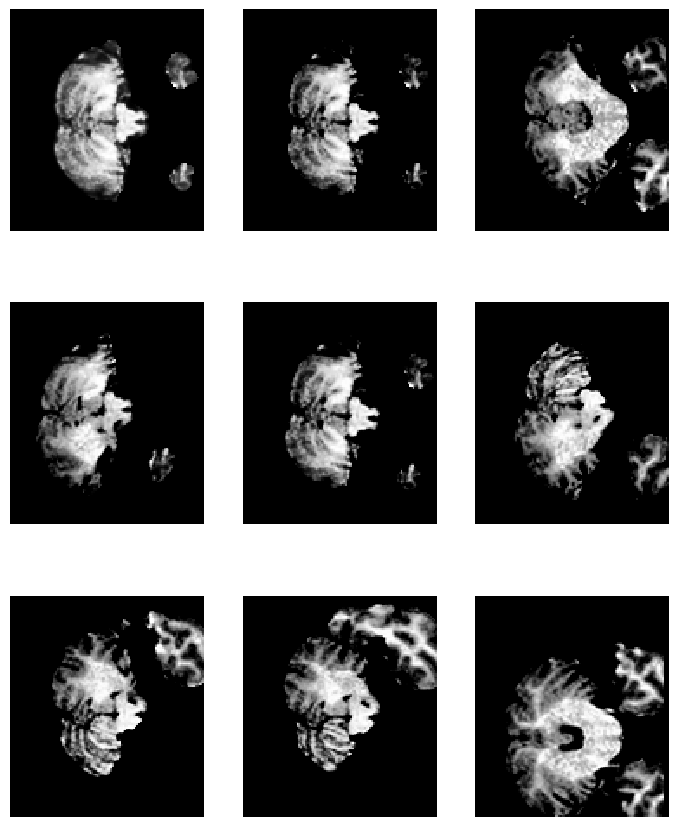

In [157]:
import matplotlib.pyplot as plt

w, h = 20, 20
fig = plt.figure(figsize=(8.5, 11), dpi=100)
columns, rows = 3, 3


orig = nib.load('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-pre.nii.gz').get_data()
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(orig[:,:,25], cmap=plt.get_cmap('gray'))
for idx in range(1, 9):
    nme = _name = 'a{:03d}'.format(idx)
    #plt.subplot(330  + idx)
    im = nib.load("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\" + nme + "-pre.nii.gz").get_data()
    fig.add_subplot(rows, columns, idx+1)
    plt.axis('off')
    plt.imshow(im[:,:,25], cmap=plt.get_cmap('gray'))

plt.show()

In [165]:
im = nib.load("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a007-cerebellum.nii.gz").get_data()

print(im.max())
print(im.min())
print(im.mean())

1
0
0.09015154157366072


C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


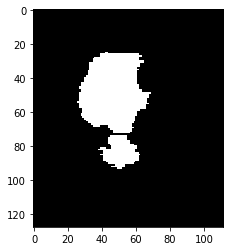

In [167]:
plt.imshow(im[:, :, 20], cmap='gray')

In [159]:
im2 = nib.load('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-cerebellum.nii.gz').get_data()
print(im2.max())
print(im2.min())
print(im2.mean())

1
0
0.09017421177455358


C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


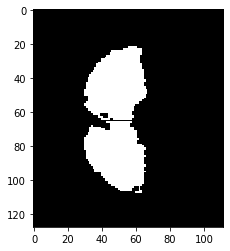

In [168]:
plt.imshow(im2[:, :, 20], cmap='gray')

In [8]:
import SimpleITK as sitk
fixed = sitk.ReadImage('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-pre.nii.gz', sitk.sitkFloat32)
#fixed = sitk.ReadImage("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a008-pre.nii.gz", sitk.sitkFloat32)
moving = sitk.ReadImage("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a007-pre.nii.gz", sitk.sitkFloat32)
simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
#simg2 = sitk.Cast(sitk.RescaleIntensity(resampled), sitk.sitkUInt8)
simg3 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
cimg = sitk.Compose(simg1, simg3, simg1//2.+simg3//2.)
sitk.Show( cimg, "ImageRegistrationExhaustive Composition" )

RuntimeError: Exception thrown in SimpleITK Add: d:\a\1\sitk-build\itk-prefix\include\itk-5.2\itkImageToImageFilter.hxx:220:
ITK ERROR: AddImageFilter(000001827F03F450): Inputs do not occupy the same physical space! 
InputImage Origin: [9.6000000e+01, 1.2900000e+02, -7.7000000e+01], InputImage_1 Origin: [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]
	Tolerance: 1.0000000e-06


In [9]:
import SimpleITK as sitk
fixed = sitk.ReadImage('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-pre.nii.gz', sitk.sitkFloat32)
moving = sitk.ReadImage('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-cerebellum.nii.gz', sitk.sitkFloat32)
#fixed = sitk.ReadImage("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a008-pre.nii.gz", sitk.sitkFloat32)
#moving = sitk.ReadImage("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a007-pre.nii.gz", sitk.sitkFloat32)
simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
#simg2 = sitk.Cast(sitk.RescaleIntensity(resampled), sitk.sitkUInt8)
simg3 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
cimg = sitk.Compose(simg1, simg3, simg1//2.+simg3//2.)
sitk.Show( cimg, "ImageRegistrationExhaustive Composition" )

In [10]:
nib.load('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-pre.nii.gz').affine

array([[   1.,    0.,    0.,  -96.],
       [   0.,    1.,    0., -129.],
       [   0.,    0.,    1.,  -77.],
       [   0.,    0.,    0.,    1.]])

In [11]:
nib.load('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-cerebellum.nii.gz').affine

array([[   1.,    0.,    0.,  -96.],
       [   0.,    1.,    0., -129.],
       [   0.,    0.,    1.,  -77.],
       [   0.,    0.,    0.,    1.]])

In [12]:
imgx = nib.load("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a007-pre.nii.gz")
dt = imgx.get_data()
affn = nib.load('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-pre.nii.gz').affine
nimgx = nib.Nifti1Image(dt, affn)
nib.save(nimgx, "E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a007-pre.nii.gz")

C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [13]:
nib.load("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a007-pre.nii.gz").affine

array([[   1.,    0.,    0.,  -96.],
       [   0.,    1.,    0., -129.],
       [   0.,    0.,    1.,  -77.],
       [   0.,    0.,    0.,    1.]])

In [2]:
import SimpleITK as sitk
fixed = sitk.ReadImage('E:\\university\\phd\\phd\\datasets\\hammers_full_2017\\tests\\augmentation\\a01-pre.nii.gz', sitk.sitkFloat32)
moving = sitk.ReadImage("E:\\university\\phd\\preprocessing codes\\python-3d-image-augmentation\\output\\a007-pre.nii.gz", sitk.sitkFloat32)
simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
#simg2 = sitk.Cast(sitk.RescaleIntensity(resampled), sitk.sitkUInt8)
simg3 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
cimg = sitk.Compose(simg1, simg3, simg1//2.+simg3//2.)
sitk.Show( cimg, "ImageRegistrationExhaustive Composition" )